In [1]:
#Import Necessary Packages

import xarray as xr
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import metpy 
import metpy.calc as mpcalc 
from metpy.plots import SkewT
from metpy.units import units
from IPython.display import HTML, display 
import imageio
from tqdm import tqdm
from itertools import product
import wrf


Cannot import USCOUNTIES and USSTATES without Cartopy installed.


In [2]:
#Create Path For Data Collection 
computations_path =  '/storage/work/bsh5393/Masters Thesis/Original Variability Study/Data/'
storm16_data_path =  '/storage/work/bsh5393/storm16/'

#Create A List of File Names For Each Storm
computations_files = os.listdir(computations_path)
storm16_files = os.listdir(storm16_data_path)

#Remove Unneccessary Files From Each List
storm16_files.remove('README-TIMELEVELS')
storm16_files.remove('namelist.input')
storm16_files.remove('runstorm16.pbs.o44255112')
storm16_files.remove('cm1out_stats.nc')
computations_files.remove('.ipynb_checkpoints')

In [3]:
#Read In Data

storm16_data = xr.open_dataset(storm16_data_path+storm16_files[-1])
computations_data = xr.open_dataset(computations_path + computations_files[-1])

#Start Creating Global Variables for All Storms

#Dataset Sizes
ni = storm16_data['ni']
nj = storm16_data['nj']
nk = storm16_data['nk']

#Datapoint Locations
x_data = storm16_data['xh']*units.kilometer
y_data = storm16_data['yh']*units.kilometer
z_data = storm16_data['z']*units.kilometer

#Grid Locations (n+1)
x_grid = storm16_data['xf']*units.kilometer
y_grid = storm16_data['yf']*units.kilometer
z_grid = storm16_data['zf']*units.kilometer

computations_data.head()

<xarray.Dataset>
Dimensions:      (dim_0: 5, dim_1: 5, ni: 5, nj: 5, nk: 5)
Coordinates:
    x-direction  (ni) int64 ...
    y-direction  (nj) int64 ...
    z-direction  (nk) int64 ...
Dimensions without coordinates: dim_0, dim_1, ni, nj, nk
Data variables:
    CAPE         (nk, nj, ni) float32 ...
    CIN          (nk, nj, ni) float32 ...
    SRH1km       (dim_0, dim_1) float32 ...
    SRH3km       (dim_0, dim_1) float32 ...
    w_7.5        (nj, ni) float32 ...
    w_500        (nj, ni) float32 ...

In [5]:
#Create 2 Additional Variables: Ground Relative Winds at z = 7.5 m & Vertical Vorticity at 7.5 m 

#Ground Relative Winds
offset_u = 12.2
offset_v = 12.5
uinterp = storm16_data['uinterp'].loc[:,0,computations_data['y-direction'],computations_data['x-direction']][0].values
vinterp = storm16_data['vinterp'].loc[:,0,computations_data['y-direction'],computations_data['x-direction']][0].values
gr_u = uinterp+offset_u
gr_v = vinterp + offset_v
gr_wind_75 = np.sqrt((gr_u**2)+(gr_v**2))
data_gr_wind_75 = np.asarray(gr_wind_75).reshape(computations_data['x-direction'].shape[0]*computations_data['x-direction'].shape[0])


#Vertical Vorticity
vert_vort_75 = storm16_data['zvort'].loc[:,0,computations_data['y-direction'],computations_data['x-direction']][0].values
data_vert_vort_75 = np.asarray(vert_vort_75).reshape(computations_data['x-direction'].shape[0]*computations_data['x-direction'].shape[0])

#Create Additional Variables: Temperature & Water Vapor Mixing Ratio at z = 7.5m
qv_75 = storm16_data['qv'].loc[:,0,computations_data['y-direction'],computations_data['x-direction']][0].values
Th_75 = storm16_data['th'].loc[:,0,computations_data['y-direction'],computations_data['x-direction']][0].values
P = storm16_data['prs'].loc[:,0,computations_data['y-direction'],computations_data['x-direction']][0].values
T_75 = Th_75*(P/100000)**(0.286)

# **Horizontal Cross Sections For Relevant Fields at t = 0 hrs**

/storage/home/bsh5393/new/lib64/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


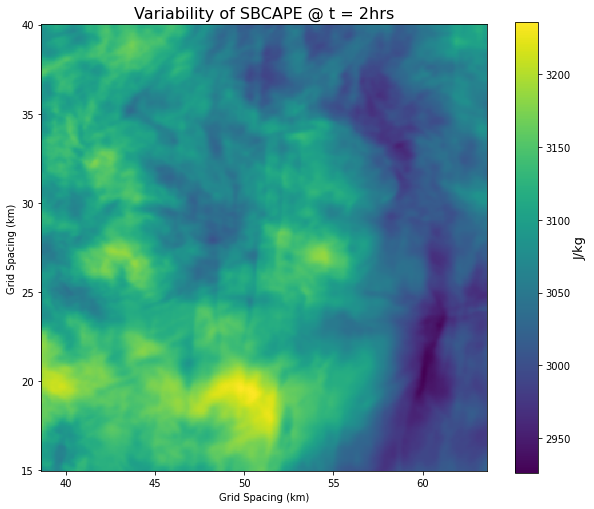

In [6]:
#CAPE

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.pcolormesh(x_data[computations_data['x-direction']], y_data[computations_data['y-direction']], computations_data['CAPE'][0])
plt.title('Variability of SBCAPE @ t = 2hrs', fontsize = 16)
plt.xlabel('Grid Spacing (km)')
plt.ylabel('Grid Spacing (km)')
clb = plt.colorbar(shrink = 0.83)
clb.set_label('J/kg', fontsize = 13)
plt.gca().set_aspect('equal')


/storage/home/bsh5393/new/lib64/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


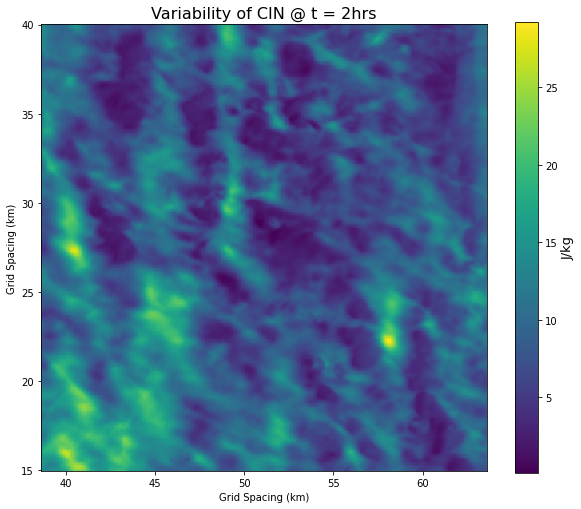

In [7]:
#CIN

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.pcolormesh(x_data[computations_data['x-direction']], y_data[computations_data['y-direction']], computations_data['CIN'][0])
plt.title('Variability of CIN @ t = 2hrs', fontsize = 16)
plt.xlabel('Grid Spacing (km)')
plt.ylabel('Grid Spacing (km)')
clb = plt.colorbar(shrink = 0.83)
clb.set_label('J/kg', fontsize = 13)
plt.gca().set_aspect('equal')

/storage/home/bsh5393/new/lib64/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


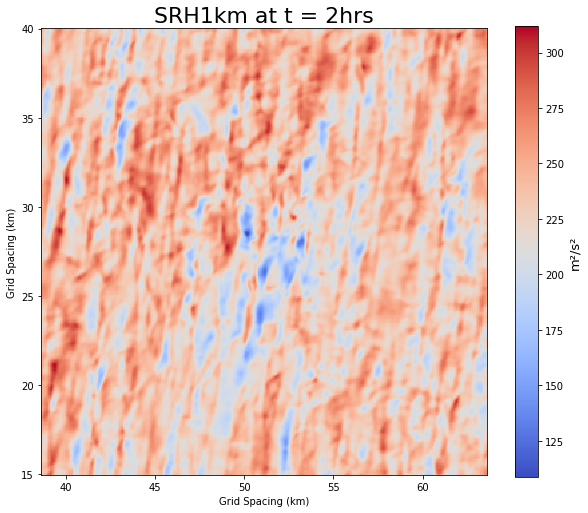

In [6]:
#SRH1km

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.pcolormesh(x_data[computations_data['x-direction']], y_data[computations_data['y-direction']], computations_data['SRH1km'], cmap ='coolwarm')
plt.title('SRH1km at t = 2hrs', fontsize = 22)
plt.xlabel('Grid Spacing (km)')
plt.ylabel('Grid Spacing (km)')
clb = plt.colorbar(shrink = 0.83)
clb.set_label('m\u00b2/s\u00b2', fontsize = 13)
plt.gca().set_aspect('equal')

/storage/home/bsh5393/new/lib64/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


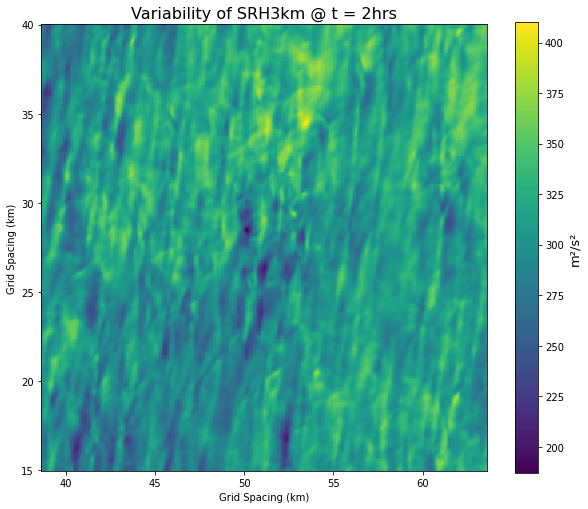

In [11]:
#SRH3km

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.pcolormesh(x_data[computations_data['x-direction']], y_data[computations_data['y-direction']], computations_data['SRH3km'])
plt.title('Variability of SRH3km @ t = 2hrs', fontsize = 16)
plt.xlabel('Grid Spacing (km)')
plt.ylabel('Grid Spacing (km)')
clb = plt.colorbar(shrink = 0.83)
clb.set_label('m\u00b2/s\u00b2', fontsize = 13)
plt.gca().set_aspect('equal')

/storage/home/bsh5393/new/lib64/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


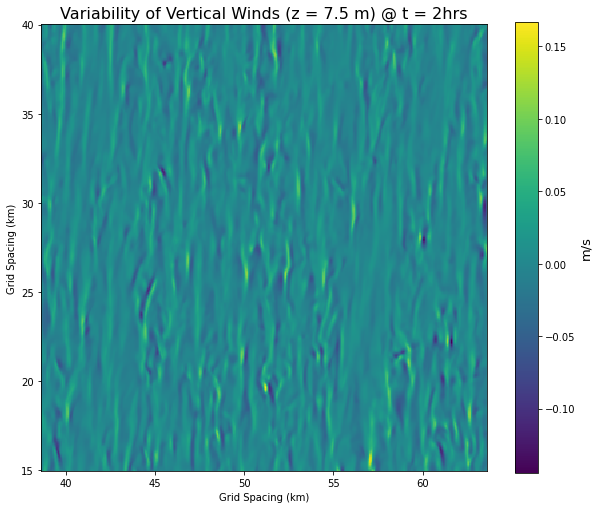

In [16]:
#w @ z = 7.5 m

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.pcolormesh(x_data[computations_data['x-direction']], y_data[computations_data['y-direction']], computations_data['w_7.5'])
plt.title('Variability of Vertical Winds (z = 7.5 m) @ t = 2hrs', fontsize = 16)
plt.xlabel('Grid Spacing (km)')
plt.ylabel('Grid Spacing (km)')
clb = plt.colorbar(shrink = 0.83)
clb.set_label('m/s', fontsize = 13)
plt.gca().set_aspect('equal')

/storage/home/bsh5393/new/lib64/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


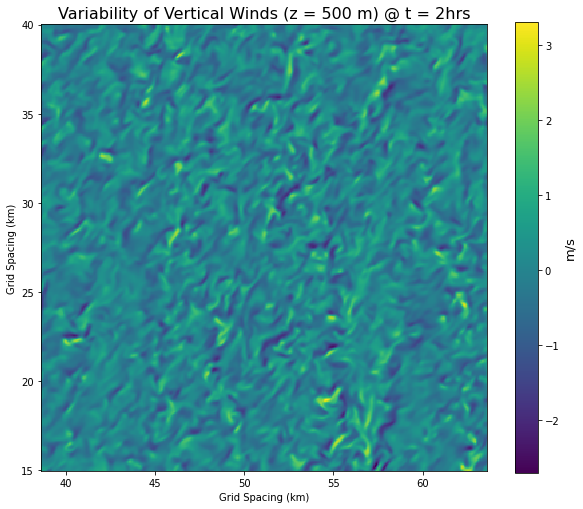

In [15]:
#w @ z = 500 m

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.pcolormesh(x_data[computations_data['x-direction']], y_data[computations_data['y-direction']], computations_data['w_500'])
plt.title('Variability of Vertical Winds (z = 500 m) @ t = 2hrs', fontsize = 16)
plt.xlabel('Grid Spacing (km)')
plt.ylabel('Grid Spacing (km)')
clb = plt.colorbar(shrink = 0.83)
clb.set_label('m/s', fontsize = 13)
plt.gca().set_aspect('equal')

/storage/home/bsh5393/new/lib64/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


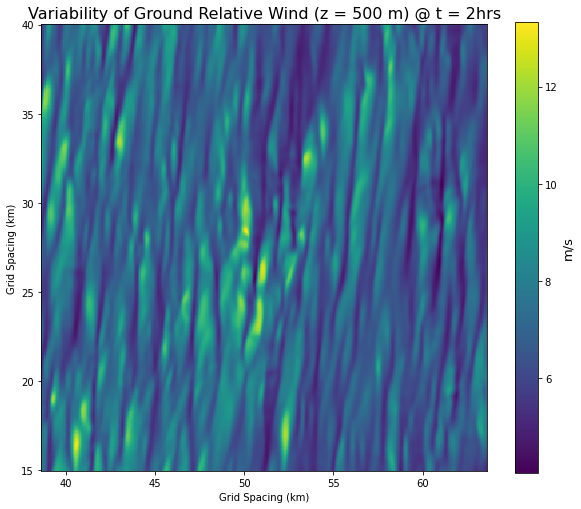

In [17]:
#Ground Relative Winds @ z = 7.5 m

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.pcolormesh(x_data[computations_data['x-direction']], y_data[computations_data['y-direction']], gr_wind_75)
plt.title('Variability of Ground Relative Wind (z = 500 m) @ t = 2hrs', fontsize = 16)
plt.xlabel('Grid Spacing (km)')
plt.ylabel('Grid Spacing (km)')
clb = plt.colorbar(shrink = 0.83)
clb.set_label('m/s', fontsize = 13)
plt.gca().set_aspect('equal')

/storage/home/bsh5393/new/lib64/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


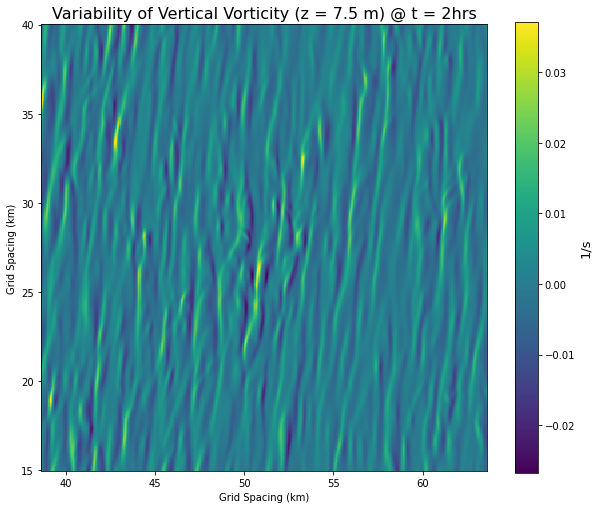

In [21]:
#vertical vorticity @ z = 7.5 m

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.pcolormesh(x_data[computations_data['x-direction']], y_data[computations_data['y-direction']], vert_vort_75)
plt.title('Variability of Vertical Vorticity (z = 7.5 m) @ t = 2hrs', fontsize = 16)
plt.xlabel('Grid Spacing (km)')
plt.ylabel('Grid Spacing (km)')
clb = plt.colorbar(shrink = 0.83)
clb.set_label('1/s', fontsize = 13)
plt.gca().set_aspect('equal')

/storage/home/bsh5393/new/lib64/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


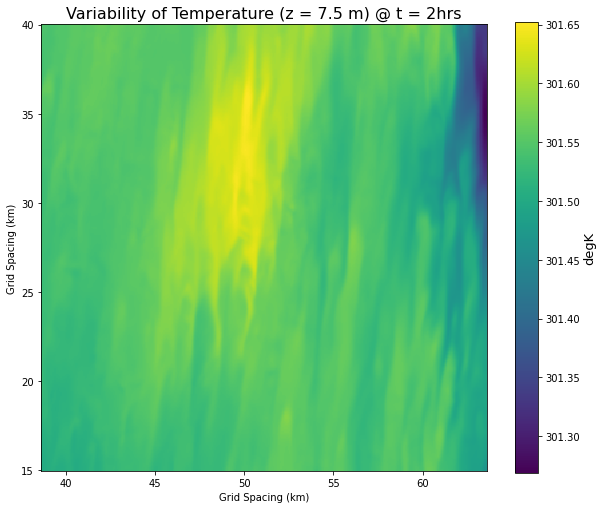

In [22]:
#Temperature @ z = 7.5 m

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.pcolormesh(x_data[computations_data['x-direction']], y_data[computations_data['y-direction']], T_75)
plt.title('Variability of Temperature (z = 7.5 m) @ t = 2hrs', fontsize = 16)
plt.xlabel('Grid Spacing (km)')
plt.ylabel('Grid Spacing (km)')
clb = plt.colorbar(shrink = 0.83)
clb.set_label('degK', fontsize = 13)
plt.gca().set_aspect('equal')

/storage/home/bsh5393/new/lib64/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


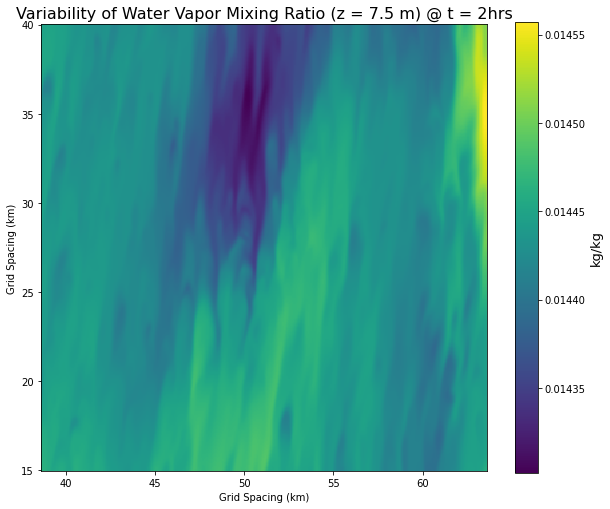

In [23]:
#Water Vapor Mixing Ratio @ z = 7.5 m

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.pcolormesh(x_data[computations_data['x-direction']], y_data[computations_data['y-direction']], qv_75)
plt.title('Variability of Water Vapor Mixing Ratio (z = 7.5 m) @ t = 2hrs', fontsize = 16)
plt.xlabel('Grid Spacing (km)')
plt.ylabel('Grid Spacing (km)')
clb = plt.colorbar(shrink = 0.83)
clb.set_label('kg/kg', fontsize = 13)
plt.gca().set_aspect('equal')

# Bonus Task: Get Average of CAPE/CIN/SRH to get a Apples to Apples Comparison

In [18]:
#CAPE-CIN (Average Value over 25km x 25km Domain) 

#Import Data
QV_avg = storm16_data['qv'].loc[:,:,computations_data['y-direction'],computations_data['x-direction']][0].mean(axis=(1,2))
P_avg = storm16_data['prs'].loc[:,:,computations_data['y-direction'],computations_data['x-direction']][0].mean(axis=(1,2))/100
Th_avg = storm16_data['th'].loc[:,:,computations_data['y-direction'],computations_data['x-direction']][0].mean(axis=(1,2))

#For the WRF CAPE Function We Need: Total Pressure (hPa), Temperature (degK), Water Vapor Mixing Ratio (kg/kg), *Geopotential Height* (m), Terrain Height (m), Surface Pressure (hPa)
T_avg = mpcalc.temperature_from_potential_temperature(P_avg*units.hPa,Th_avg*units.kelvin) #Temperature from Potential Temperature
Height = np.asarray(z_data*1000).reshape(121) #"Geopotential Height"
Terrain = 0 #Terrain (Assuming Flat Surface)
P_sfc = P_avg[0] #Surface Pressure

#WRF CAPE Computation
results = wrf.cape_3d(P_avg,T_avg,QV_avg,Height,Terrain, P_sfc, ter_follow = True,meta= True)
CAPE_avg = results[0][0]
CIN_avg = results[1][0]


#SRH1km & SRH3km (Average Values over 25km x 25km Domain)

#Import Data
u_avg = storm16_data['uinterp'].loc[:,:,computations_data['y-direction'],computations_data['x-direction']][0].mean(axis=(1,2))
v_avg = storm16_data['vinterp'].loc[:,:,computations_data['y-direction'],computations_data['x-direction']][0].mean(axis=(1,2))

#For the WRF SRH Function We Need: U (m/s), V (m/s), Height (m), Terrain (m), Top (m)
SRH1km_avg = mpcalc.storm_relative_helicity(Height*units.meter, u_avg*units('m/s'),v_avg*units('m/s'), depth = 1000*units.meter)
SRH3km_avg = mpcalc.storm_relative_helicity(Height*units.meter, u_avg*units('m/s'),v_avg*units('m/s'), depth = 3000*units.meter)

#Average Vertical Winds
w_75_avg = computations_data['w_7.5'].mean().values
w_500_avg = computations_data['w_500'].mean().values


In [19]:
#Average Values
print(f'Avg. CAPE = {CAPE_avg.values} J/kg \nAvg. CIN = {CIN_avg.values} J/kg \nAvg. SRH1km = {SRH1km_avg[0]} \nAvg. SRH3km = {SRH3km_avg[0]}')


Avg. CAPE = 3077.72021484375 J/kg 
Avg. CIN = 8.32684326171875 J/kg 
Avg. SRH1km = 225.47527281077237 meter ** 2 / second ** 2 
Avg. SRH3km = 303.5042724048616 meter ** 2 / second ** 2


# **BoxPlots For the Data**

In [7]:
#First Need To Convert Our Dataframes to 1D Arrays
data_CAPE = np.asarray(computations_data['CAPE'][0]).reshape(computations_data['x-direction'].shape[0]*computations_data['x-direction'].shape[0])
data_CIN = np.asarray(computations_data['CIN'][0]).reshape(computations_data['x-direction'].shape[0]*computations_data['x-direction'].shape[0])
data_SRH1km = np.asarray(computations_data['SRH1km']).reshape(computations_data['x-direction'].shape[0]*computations_data['x-direction'].shape[0])
data_SRH3km = np.asarray(computations_data['SRH3km']).reshape(computations_data['x-direction'].shape[0]*computations_data['x-direction'].shape[0])
data_w_75 = np.asarray(computations_data['w_7.5']).reshape(computations_data['x-direction'].shape[0]*computations_data['x-direction'].shape[0])
data_w_500 = np.asarray(computations_data['w_500']).reshape(computations_data['x-direction'].shape[0]*computations_data['x-direction'].shape[0])
data_vert_vort_75 = data_vert_vort_75
data_gr_wind_75 = data_gr_wind_75
data_T_75 = np.asarray(T_75).reshape(computations_data['x-direction'].shape[0]*computations_data['x-direction'].shape[0])
data_qv_75 = np.asarray(qv_75).reshape(computations_data['x-direction'].shape[0]*computations_data['x-direction'].shape[0])


In [10]:
print(f'{data_CAPE.mean()}, {data_CAPE.std()}')
print(f'{data_CIN.mean()}, {data_CIN.std()}')
print(f'{data_SRH1km.mean()}, {data_SRH1km.std()}')
print(f'{data_SRH3km.mean()}, {data_SRH3km.std()}')
print(f'{data_gr_wind_75.mean()}, {data_gr_wind_75.std()}')
print(f'{data_vert_vort_75.mean()}, {data_vert_vort_75.std()}')


3080.078369140625, 58.06707000732422
8.711753845214844, 4.288973808288574
233.74598693847656, 23.064716339111328
308.11358642578125, 24.50181007385254
7.04874324798584, 1.2356940507888794
-4.0265622374136e-05, 0.006158293224871159


Text(0.5, 1.0, 'WV Mixing Ratio @ z = 7.5 m (kg/kg)')

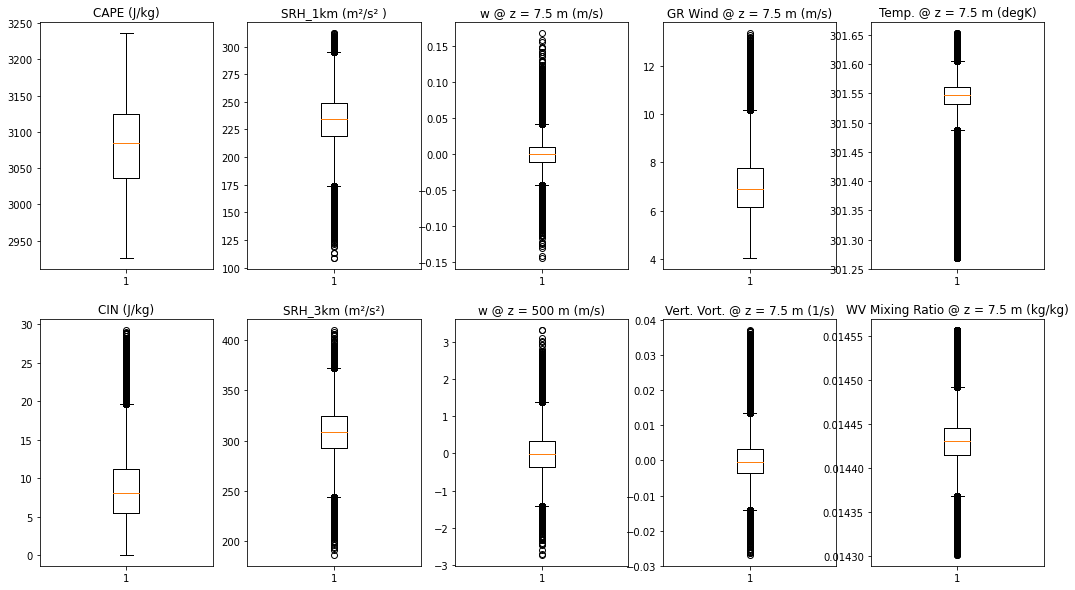

In [21]:
#Plot Box and Whisker Plots For ALL Parameters (w/ Outlier Points)

fig, axs = plt.subplots(nrows =2, ncols = 5, figsize = (18,10))

#CAPE
axs[0,0].boxplot(data_CAPE)
axs[0,0].set_title('CAPE (J/kg)')

#CIN
axs[1,0].boxplot(data_CIN)
axs[1,0].set_title('CIN (J/kg)')

#SRH1km 
axs[0,1].boxplot(data_SRH1km)
axs[0,1].set_title('SRH_1km (m\u00b2/s\u00b2 )')

#SRH3km
axs[1,1].boxplot(data_SRH3km)
axs[1,1].set_title('SRH_3km (m\u00b2/s\u00b2)')

#w_7.5
axs[0,2].boxplot(data_w_75)
axs[0,2].set_title('w @ z = 7.5 m (m/s)')

#w_500
axs[1,2].boxplot(data_w_500)
axs[1,2].set_title('w @ z = 500 m (m/s)')

#Ground Relative Wind 
axs[0,3].boxplot(data_gr_wind_75)
axs[0,3].set_title('GR Wind @ z = 7.5 m (m/s)')

#Vertical Vorticity 
axs[1,3].boxplot(data_vert_vort_75)
axs[1,3].set_title('Vert. Vort. @ z = 7.5 m (1/s)')

#Temperature 
axs[0,4].boxplot(data_T_75)
axs[0,4].set_title('Temp. @ z = 7.5 m (degK)')

#Water Vapor Mixing Ratio
axs[1,4].boxplot(data_qv_75)
axs[1,4].set_title('WV Mixing Ratio @ z = 7.5 m (kg/kg)')

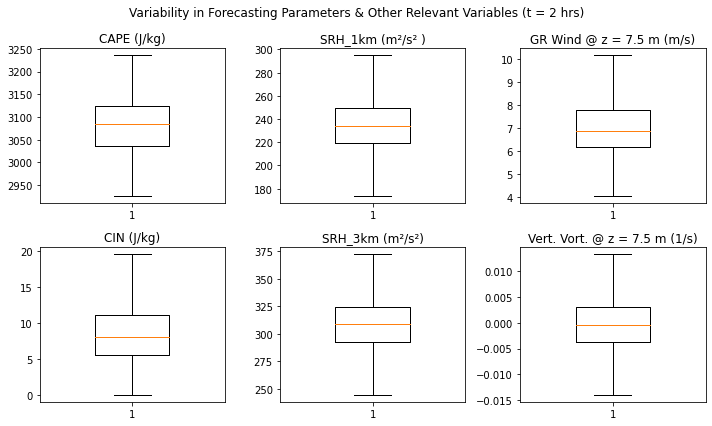

In [11]:
#Plot Box and Whisker Plots For ALL Parameters (w/o Outlier Points)

fig, axs = plt.subplots(nrows =2, ncols = 3, figsize = (10,6))

fig.suptitle('Variability in Forecasting Parameters & Other Relevant Variables (t = 2 hrs)')

#CAPE
axs[0,0].boxplot(data_CAPE, 0, '', widths = 0.4)
#axs[0,0].scatter(1,CAPE_avg.values,color='green')
axs[0,0].set_title('CAPE (J/kg)')

#CIN
axs[1,0].boxplot(data_CIN, 0, '', widths = 0.4)
#axs[1,0].scatter(1,CIN_avg.values,color='green')
axs[1,0].set_title('CIN (J/kg)')

#SRH1km 
axs[0,1].boxplot(data_SRH1km, 0, '', widths = 0.4)
#axs[0,1].scatter(1,SRH1km_avg[0],color='green')
axs[0,1].set_title('SRH_1km (m\u00b2/s\u00b2 )')

#SRH3km
axs[1,1].boxplot(data_SRH3km, 0, '', widths = 0.4)
#axs[1,1].scatter(1,SRH3km_avg[0],color='green')
axs[1,1].set_title('SRH_3km (m\u00b2/s\u00b2)')

#w_7.5
#axs[0,2].boxplot(data_w_75, 0, '', widths = 0.4)
#axs[0,2].scatter(1,w_75_avg,color='green')
#axs[0,2].set_title('w @ z = 7.5 m (m/s)')

#w_500
#axs[1,2].boxplot(data_w_500, 0, '', widths = 0.4)
#axs[1,2].scatter(1,w_500_avg,color='green')
#axs[1,2].set_title('w @ z = 500 m (m/s)')

#Ground Relative Wind 
axs[0,2].boxplot(data_gr_wind_75, 0 , '', widths = 0.4)
axs[0,2].set_title('GR Wind @ z = 7.5 m (m/s)')

#Vertical Vorticity 
axs[1,2].boxplot(data_vert_vort_75, 0 , '', widths = 0.4)
axs[1,2].set_title('Vert. Vort. @ z = 7.5 m (1/s)')

#Temperature 
#axs[0,4].boxplot(data_T_75, 0 , '', widths = 0.4)
#axs[0,4].set_title('Temp. @ z = 7.5 m (degK)')

#Water Vapor Mixing Ratio
#axs[1,4].boxplot(data_qv_75, 0 , '', widths = 0.4)
#axs[1,4].set_title('WV Mixing Ratio @ z = 7.5 m (kg/kg)')

plt.tight_layout()
plt.show()

In [12]:
def stats_calc(dataset):
    std = (dataset.max()-dataset.min())/4
    mean = dataset.mean()
    return mean, std;

In [18]:
stats_calc(data_vert_vort_75)

(-4.0265622e-05, 0.015986032783985138)

# **Correlation Plots**

In [23]:
#SBCAPE With Other Variables

corr_CAPE_CIN = np.corrcoef(data_CAPE, data_CIN)[0][1]
corr_CAPE_SRH1km = np.corrcoef(data_CAPE, data_SRH1km)[0][1]
corr_CAPE_SRH3km = np.corrcoef(data_CAPE, data_SRH3km)[0][1]
corr_CAPE_w75 = np.corrcoef(data_CAPE, data_w_75)[0][1]
corr_CAPE_w500 = np.corrcoef(data_CAPE, data_w_500)[0][1]
corr_CAPE_gr_wind_75 = np.corrcoef(data_CAPE, data_gr_wind_75)[0][1]
corr_CAPE_vert_vort_75 = np.corrcoef(data_CAPE, data_vert_vort_75)[0][1]
corr_CAPE_T_75 = np.corrcoef(data_CAPE, data_T_75)[0][1]
corr_CAPE_qv_75 = np.corrcoef(data_CAPE, data_qv_75)[0][1]

print(f'CAPE & CIN = {corr_CAPE_CIN} \nCAPE & SRH1km = {corr_CAPE_SRH1km} \nCAPE & SRH3km = {corr_CAPE_SRH3km} \nCAPE & w_7.5m = {corr_CAPE_w75} \nCAPE & w_500m = {corr_CAPE_w500} \nCAPE & gr_wind75 = {corr_CAPE_gr_wind_75} \nCAPE & vert_vort75 = {corr_CAPE_vert_vort_75} \nCAPE & T_75 = {corr_CAPE_T_75} \nCAPE & qv_75 = {corr_CAPE_qv_75}')

CAPE & CIN = 0.15533426335106323 
CAPE & SRH1km = -0.058845648316633796 
CAPE & SRH3km = -0.2902014012016521 
CAPE & w_7.5m = 0.00869404900445206 
CAPE & w_500m = 0.011592559962568645 
CAPE & gr_wind75 = 0.17485768873431715 
CAPE & vert_vort75 = 0.009087624655251897 
CAPE & T_75 = 0.09842621704290949 
CAPE & qv_75 = 0.3292946236638888


In [24]:
#CIN With Other Variables

corr_CIN_CAPE = np.corrcoef(data_CIN, data_CAPE)[0][1]
corr_CIN_SRH1km = np.corrcoef(data_CIN, data_SRH1km)[0][1]
corr_CIN_SRH3km = np.corrcoef(data_CIN, data_SRH3km)[0][1]
corr_CIN_w75 = np.corrcoef(data_CIN, data_w_75)[0][1]
corr_CIN_w500 = np.corrcoef(data_CIN, data_w_500)[0][1]
corr_CIN_gr_wind_75 = np.corrcoef(data_CIN, data_gr_wind_75)[0][1]
corr_CIN_vert_vort_75 = np.corrcoef(data_CIN, data_vert_vort_75)[0][1]
corr_CIN_T_75 = np.corrcoef(data_CIN, data_T_75)[0][1]
corr_CIN_qv_75 = np.corrcoef(data_CIN, data_qv_75)[0][1]


print(f'CIN & CAPE = {corr_CIN_CAPE} \nCIN & SRH1km = {corr_CIN_SRH1km} \nCIN & SRH3km = {corr_CIN_SRH3km} \nCIN & w_7.5m = {corr_CIN_w75} \nCIN & w_500m = {corr_CIN_w500} \nCIN & gr_wind75 = {corr_CIN_gr_wind_75} \nCIN & vert_vort75 = {corr_CIN_vert_vort_75} \nCIN & T_75 = {corr_CIN_T_75} \nCIN & qv_75 = {corr_CIN_qv_75}')

CIN & CAPE = 0.15533426335106323 
CIN & SRH1km = 0.1975951548442138 
CIN & SRH3km = -0.3169224032817688 
CIN & w_7.5m = 0.005554167201123389 
CIN & w_500m = -0.008438779429780956 
CIN & gr_wind75 = 0.10855272009194998 
CIN & vert_vort75 = -0.00021775059158665998 
CIN & T_75 = -0.10338791430332443 
CIN & qv_75 = 0.1037986116232883


In [25]:
#SRH1km With Other Variables

corr_SRH1km_CAPE = np.corrcoef(data_SRH1km, data_CAPE)[0][1]
corr_SRH1km_CIN = np.corrcoef(data_SRH1km, data_CIN)[0][1]
corr_SRH1km_SRH3km = np.corrcoef(data_SRH1km, data_SRH3km)[0][1]
corr_SRH1km_w75 = np.corrcoef(data_SRH1km, data_w_75)[0][1]
corr_SRH1km_w500 = np.corrcoef(data_SRH1km, data_w_500)[0][1]
corr_SRH1km_gr_wind_75 = np.corrcoef(data_SRH1km, data_gr_wind_75)[0][1]
corr_SRH1km_vert_vort_75 = np.corrcoef(data_SRH1km, data_vert_vort_75)[0][1]
corr_SRH1km_T_75 = np.corrcoef(data_SRH1km, data_T_75)[0][1]
corr_SRH1km_qv_75 = np.corrcoef(data_SRH1km, data_qv_75)[0][1]


print(f'SRH1km & CAPE = {corr_SRH1km_CAPE} \nSRH1km & CIN = {corr_SRH1km_CIN} \nSRH1km & SRH3km = {corr_SRH1km_SRH3km} \nSRH1km & w_7.5m = {corr_SRH1km_w75} \nSRH1km & w_500m = {corr_SRH1km_w500}\nSRH1km & gr_wind75 = {corr_SRH1km_gr_wind_75} \nSRH1km & vert_vort75 = {corr_SRH1km_vert_vort_75} \nSRH1km & T_75 = {corr_SRH1km_T_75} \nSRH1km & qv_75 = {corr_SRH1km_qv_75} ')

SRH1km & CAPE = -0.058845648316633796 
SRH1km & CIN = 0.19759515484421378 
SRH1km & SRH3km = 0.7650850833522653 
SRH1km & w_7.5m = 0.021876979183856324 
SRH1km & w_500m = 0.00955373711681038
SRH1km & gr_wind75 = -0.5973091693608062 
SRH1km & vert_vort75 = -0.04964825596109424 
SRH1km & T_75 = -0.021440759263895427 
SRH1km & qv_75 = -0.1242817188100323 


In [26]:
#SRH3km With Other Variables

corr_SRH3km_CAPE = np.corrcoef(data_SRH3km, data_CAPE)[0][1]
corr_SRH3km_CIN = np.corrcoef(data_SRH3km, data_CIN)[0][1]
corr_SRH3km_SRH1km = np.corrcoef(data_SRH3km, data_SRH1km)[0][1]
corr_SRH3km_w75 = np.corrcoef(data_SRH3km, data_w_75)[0][1]
corr_SRH3km_w500 = np.corrcoef(data_SRH3km, data_w_500)[0][1]
corr_SRH3km_gr_wind_75 = np.corrcoef(data_SRH3km, data_gr_wind_75)[0][1]
corr_SRH3km_vert_vort_75 = np.corrcoef(data_SRH3km, data_vert_vort_75)[0][1]
corr_SRH3km_T_75 = np.corrcoef(data_SRH3km, data_T_75)[0][1]
corr_SRH3km_qv_75 = np.corrcoef(data_SRH3km, data_qv_75)[0][1]


print(f'SRH3km & CAPE = {corr_SRH3km_CAPE} \nSRH3km & CIN = {corr_SRH3km_CIN} \nSRH3km & SRH1km = {corr_SRH3km_SRH1km} \nSRH3km & w_7.5m = {corr_SRH3km_w75} \nSRH3km & w_500m = {corr_SRH3km_w500} \nSRH3km & gr_wind75 = {corr_SRH3km_gr_wind_75} \nSRH3km & vert_vort75 = {corr_SRH3km_vert_vort_75} \nSRH3km & T_75 = {corr_SRH3km_T_75} \nSRH3km & qv_75 = {corr_SRH3km_qv_75} ')

SRH3km & CAPE = -0.2902014012016521 
SRH3km & CIN = -0.3169224032817688 
SRH3km & SRH1km = 0.7650850833522652 
SRH3km & w_7.5m = 0.017056794719801423 
SRH3km & w_500m = 0.019642362696820237 
SRH3km & gr_wind75 = -0.6861732290116663 
SRH3km & vert_vort75 = -0.04529246090749989 
SRH3km & T_75 = -0.05363621339260502 
SRH3km & qv_75 = -0.19868434134006135 


In [27]:
#w_75 With Other Variables

corr_w75_CAPE = np.corrcoef(data_w_75, data_CAPE)[0][1]
corr_w75_CIN = np.corrcoef(data_w_75, data_CIN)[0][1]
corr_w75_SRH1km = np.corrcoef(data_w_75, data_SRH1km)[0][1]
corr_w75_SRH3km = np.corrcoef(data_w_75, data_SRH3km)[0][1]
corr_w75_w500 = np.corrcoef(data_w_75, data_w_500)[0][1]
corr_w75_gr_wind_75 = np.corrcoef(data_w_75, data_gr_wind_75)[0][1]
corr_w75_vert_vort_75 = np.corrcoef(data_w_75, data_vert_vort_75)[0][1]
corr_w75_T_75 = np.corrcoef(data_w_75, data_T_75)[0][1]
corr_w75_qv_75 = np.corrcoef(data_w_75, data_qv_75)[0][1]



print(f'w_75 & CAPE = {corr_w75_CAPE} \nw_75 & CIN = {corr_w75_CIN} \nw_75 & SRH1km = {corr_w75_SRH1km} \nw_75 & SRH3km = {corr_w75_SRH3km} \nw_75 & w_500m = {corr_w75_w500} \nw_75 & gr_wind75 = {corr_w75_gr_wind_75} \nw_75 & vert_vort75 = {corr_w75_vert_vort_75} \nw_75 & T_75 = {corr_w75_T_75} \nw_75 & qv_75 = {corr_w75_qv_75}')

w_75 & CAPE = 0.00869404900445206 
w_75 & CIN = 0.005554167201123389 
w_75 & SRH1km = 0.021876979183856324 
w_75 & SRH3km = 0.017056794719801423 
w_75 & w_500m = 0.11017678345701161 
w_75 & gr_wind75 = -0.019507692453652407 
w_75 & vert_vort75 = 0.04044267806921663 
w_75 & T_75 = 0.00027413113518334807 
w_75 & qv_75 = 0.010718519561927039


In [28]:
#w_500 With Other Variables

corr_w500_CAPE = np.corrcoef(data_w_500, data_CAPE)[0][1]
corr_w500_CIN = np.corrcoef(data_w_500, data_CIN)[0][1]
corr_w500_SRH1km = np.corrcoef(data_w_500, data_SRH1km)[0][1]
corr_w500_SRH3km = np.corrcoef(data_w_500, data_SRH3km)[0][1]
corr_w500_w75 = np.corrcoef(data_w_500, data_w_75)[0][1]
corr_w500_gr_wind_75 = np.corrcoef(data_w_500, data_gr_wind_75)[0][1]
corr_w500_vert_vort_75 = np.corrcoef(data_w_500, data_vert_vort_75)[0][1]
corr_w500_T_75 = np.corrcoef(data_w_500, data_T_75)[0][1]
corr_w500_qv_75 = np.corrcoef(data_w_500, data_qv_75)[0][1]


print(f'w_500 & CAPE = {corr_w500_CAPE} \nw_500 & CIN = {corr_w500_CIN} \nw_500 & SRH1km = {corr_w500_SRH1km} \nw_500 & SRH3km = {corr_w500_SRH3km} \nw_500 & w_75m = {corr_w500_w75} \nw_500 & gr_wind75 = {corr_w500_gr_wind_75} \nw_500 & vert_vort75 = {corr_w500_vert_vort_75} \nw_500 & T_75 = {corr_w500_T_75} \nw_500 & qv_75 = {corr_w500_qv_75}')

w_500 & CAPE = 0.011592559962568645 
w_500 & CIN = -0.008438779429780956 
w_500 & SRH1km = 0.00955373711681038 
w_500 & SRH3km = 0.01964236269682024 
w_500 & w_75m = 0.11017678345701161 
w_500 & gr_wind75 = -0.029149450361069813 
w_500 & vert_vort75 = -0.020100585174713897 
w_500 & T_75 = -0.030113872075456963 
w_500 & qv_75 = 0.027483201515282857


In [29]:
#gr_wind75 With Other Variables

corr_gr_wind75_CAPE = np.corrcoef(data_gr_wind_75, data_CAPE)[0][1]
corr_gr_wind75_CIN = np.corrcoef(data_gr_wind_75, data_CIN)[0][1]
corr_gr_wind75_SRH1km = np.corrcoef(data_gr_wind_75, data_SRH1km)[0][1]
corr_gr_wind75_SRH3km = np.corrcoef(data_gr_wind_75, data_SRH3km)[0][1]
corr_gr_wind75_w75 = np.corrcoef(data_gr_wind_75, data_w_75)[0][1]
corr_gr_wind75_w_500 = np.corrcoef(data_gr_wind_75, data_w_500)[0][1]
corr_gr_wind75_vert_vort_75 = np.corrcoef(data_gr_wind_75, data_vert_vort_75)[0][1]
corr_gr_wind75_T_75 = np.corrcoef(data_gr_wind_75, data_T_75)[0][1]
corr_gr_wind75_qv_75 = np.corrcoef(data_gr_wind_75, data_qv_75)[0][1]


print(f'gr_wind75 & CAPE = {corr_gr_wind75_CAPE} \ngr_wind75 & CIN = {corr_gr_wind75_CIN} \ngr_wind75 & SRH1km = {corr_gr_wind75_SRH1km} \ngr_wind75 & SRH3km = {corr_gr_wind75_SRH3km} \ngr_wind75 & w_75m = {corr_gr_wind75_w75} \ngr_wind75 & w_500 = {corr_gr_wind75_w_500} \ngr_wind75 & vert_vort75 = {corr_gr_wind75_vert_vort_75} \ngr_wind75 & T_75 = {corr_gr_wind75_T_75} \ngr_wind75 & qv_75 = {corr_gr_wind75_qv_75}')

gr_wind75 & CAPE = 0.17485768873431717 
gr_wind75 & CIN = 0.10855272009194998 
gr_wind75 & SRH1km = -0.5973091693608062 
gr_wind75 & SRH3km = -0.6861732290116663 
gr_wind75 & w_75m = -0.019507692453652407 
gr_wind75 & w_500 = -0.029149450361069817 
gr_wind75 & vert_vort75 = 0.028226835276626047 
gr_wind75 & T_75 = 0.15723918514457033 
gr_wind75 & qv_75 = 0.008752555468149783


In [30]:
#vert_vort75 With Other Variables

corr_vert_vort75_CAPE = np.corrcoef(data_vert_vort_75, data_CAPE)[0][1]
corr_vert_vort75_CIN = np.corrcoef(data_vert_vort_75, data_CIN)[0][1]
corr_vert_vort75_SRH1km = np.corrcoef(data_vert_vort_75, data_SRH1km)[0][1]
corr_vert_vort75_SRH3km = np.corrcoef(data_vert_vort_75, data_SRH3km)[0][1]
corr_vert_vort75_w75 = np.corrcoef(data_vert_vort_75, data_w_75)[0][1]
corr_vert_vort75_w_500 = np.corrcoef(data_vert_vort_75, data_w_500)[0][1]
corr_vert_vort75_gr_wind75 = np.corrcoef(data_vert_vort_75, data_gr_wind_75)[0][1]
corr_vert_vort75_T_75 = np.corrcoef(data_vert_vort_75, data_T_75)[0][1]
corr_vert_vort75_qv_75 = np.corrcoef(data_vert_vort_75, data_qv_75)[0][1]


print(f'vert_vort75 & CAPE = {corr_vert_vort75_CAPE} \nvert_vort75 & CIN = {corr_vert_vort75_CIN} \nvert_vort75 & SRH1km = {corr_vert_vort75_SRH1km} \nvert_vort75 & SRH3km = {corr_vert_vort75_SRH3km} \nvert_vort75 & w_75m = {corr_vert_vort75_w75} \nvert_vort75 & w_500 = {corr_vert_vort75_w_500} \nvert_vort75 & gr_wind75 = {corr_vert_vort75_gr_wind75}\nvert_vort75 & T_75 = {corr_vert_vort75_T_75} \nvert_vort75 & qv_75 = {corr_vert_vort75_qv_75}')

vert_vort75 & CAPE = 0.009087624655251897 
vert_vort75 & CIN = -0.00021775059158665996 
vert_vort75 & SRH1km = -0.04964825596109424 
vert_vort75 & SRH3km = -0.04529246090749988 
vert_vort75 & w_75m = 0.04044267806921663 
vert_vort75 & w_500 = -0.020100585174713897 
vert_vort75 & gr_wind75 = 0.028226835276626047
vert_vort75 & T_75 = 0.005080009581119342 
vert_vort75 & qv_75 = 0.004590603400941888


In [31]:
#T_75 With Other Variables

corr_T_75_CAPE = np.corrcoef(data_T_75, data_CAPE)[0][1]
corr_T_75_CIN = np.corrcoef(data_T_75, data_CIN)[0][1]
corr_T_75_SRH1km = np.corrcoef(data_T_75, data_SRH1km)[0][1]
corr_T_75_SRH3km = np.corrcoef(data_T_75, data_SRH3km)[0][1]
corr_T_75_w75 = np.corrcoef(data_T_75, data_w_75)[0][1]
corr_T_75_w_500 = np.corrcoef(data_T_75, data_w_500)[0][1]
corr_T_75_vert_vort_75 = np.corrcoef(data_T_75, data_vert_vort_75)[0][1]
corr_T_75_gr_wind75 = np.corrcoef(data_T_75, data_gr_wind_75)[0][1]
corr_T_75_qv_75 = np.corrcoef(data_T_75, data_qv_75)[0][1]


print(f'T_75 & CAPE = {corr_T_75_CAPE} \nT_75 & CIN = {corr_T_75_CIN} \nT_75 & SRH1km = {corr_T_75_SRH1km} \nT_75 & SRH3km = {corr_T_75_SRH3km} \nT_75 & w_75m = {corr_T_75_w75} \nT_75 & w_500 = {corr_T_75_w_500} \nT_75 & vert_vort75 = {corr_T_75_vert_vort_75} \nT_75 & gr_wind75 = {corr_T_75_gr_wind75} \nT_75 & qv_75 = {corr_T_75_qv_75}')

T_75 & CAPE = 0.0984262170429095 
T_75 & CIN = -0.10338791430332443 
T_75 & SRH1km = -0.021440759263895423 
T_75 & SRH3km = -0.05363621339260502 
T_75 & w_75m = 0.00027413113518334807 
T_75 & w_500 = -0.03011387207545696 
T_75 & vert_vort75 = 0.005080009581119342 
T_75 & gr_wind75 = 0.15723918514457036 
T_75 & qv_75 = -0.7750269183649757


In [32]:
#qv_75 With Other Variables

corr_qv_75_CAPE = np.corrcoef(data_qv_75, data_CAPE)[0][1]
corr_qv_75_CIN = np.corrcoef(data_qv_75, data_CIN)[0][1]
corr_qv_75_SRH1km = np.corrcoef(data_qv_75, data_SRH1km)[0][1]
corr_qv_75_SRH3km = np.corrcoef(data_qv_75, data_SRH3km)[0][1]
corr_qv_75_w75 = np.corrcoef(data_qv_75, data_w_75)[0][1]
corr_qv_75_w_500 = np.corrcoef(data_qv_75, data_w_500)[0][1]
corr_qv_75_vert_vort75 = np.corrcoef(data_qv_75, data_vert_vort_75)[0][1]
corr_qv_75_gr_wind75 = np.corrcoef(data_qv_75, data_gr_wind_75)[0][1]
corr_qv_75_T_75 = np.corrcoef(data_qv_75, data_T_75)[0][1]


print(f'qv_75 & CAPE = {corr_qv_75_CAPE} \nqv_75 & CIN = {corr_qv_75_CIN} \nqv_75 & SRH1km = {corr_qv_75_SRH1km} \nqv_75 & SRH3km = {corr_qv_75_SRH3km} \nqv_75 & w_75m = {corr_qv_75_w75} \nqv_75 & w_500 = {corr_qv_75_w_500} \nqv_75 & vert_vort75 = {corr_qv_75_vert_vort75} \nqv_75 & gr_wind75 = {corr_qv_75_gr_wind75} \nqv_75 & T_75 = {corr_qv_75_T_75}')

qv_75 & CAPE = 0.32929462366388884 
qv_75 & CIN = 0.10379861162328831 
qv_75 & SRH1km = -0.1242817188100323 
qv_75 & SRH3km = -0.19868434134006135 
qv_75 & w_75m = 0.010718519561927039 
qv_75 & w_500 = 0.027483201515282857 
qv_75 & vert_vort75 = 0.004590603400941888 
qv_75 & gr_wind75 = 0.008752555468149783 
qv_75 & T_75 = -0.7750269183649756


In [33]:
#Create Table Of Correlation Values 

table = PrettyTable()
table.field_names = ["Corr. Coeff.", "CAPE", "CIN", "SRH1km", 'SRH3km', 'w (z = 7.5 m)', 'w (z = 500 m)', 'GR Wind', 'Vert Vort.','T','WV']
table.add_row(["CAPE", 1, round(corr_CAPE_CIN,3), round(corr_CAPE_SRH1km,3), round(corr_CAPE_SRH3km,3), round(corr_CAPE_w75,3), round(corr_CAPE_w500,3), round(corr_CAPE_gr_wind_75,3), round(corr_CAPE_vert_vort_75,3), round(corr_CAPE_T_75,3), round(corr_CAPE_qv_75,3)])
table.add_row(["CIN", round(corr_CIN_CAPE,3), 1, round(corr_CIN_SRH1km, 3), round(corr_CIN_SRH3km,3), round(corr_CIN_w75,3),round(corr_CIN_w500,3),round(corr_CIN_gr_wind_75,3), round(corr_CIN_vert_vort_75,3), round(corr_CIN_T_75,3), round(corr_CIN_qv_75,3)])
table.add_row(["SRH1km", round(corr_SRH1km_CAPE,3), round(corr_SRH1km_CIN,3), 1,round(corr_SRH1km_SRH3km,3), round(corr_SRH1km_w75,3), round(corr_SRH1km_w500, 3), round(corr_SRH1km_gr_wind_75,3), round(corr_SRH1km_vert_vort_75,3), round(corr_SRH1km_T_75,3), round(corr_SRH1km_qv_75,3)])
table.add_row(["SRH3km", round(corr_SRH3km_CAPE,3), round(corr_SRH3km_CIN,3), round(corr_SRH3km_SRH1km,3),1, round(corr_SRH3km_w75,3),round(corr_SRH3km_w500,3), round(corr_SRH3km_gr_wind_75,3), round(corr_SRH3km_vert_vort_75,3), round(corr_SRH3km_T_75,3), round(corr_SRH3km_qv_75,3)])
table.add_row(["w (z = 7.5 m)", round(corr_w75_CAPE,3), round(corr_w75_CIN,3), round(corr_w75_SRH1km,3), round(corr_w75_SRH3km, 3), 1, round(corr_w75_w500,3), round(corr_w75_gr_wind_75,3), round(corr_w75_vert_vort_75,3), round(corr_w75_T_75,3), round(corr_w75_qv_75,3)])
table.add_row(["w (z = 500 m)", round(corr_w500_CAPE,3), round(corr_w500_CIN, 3), round(corr_w500_SRH1km, 3), round(corr_w500_SRH3km,3),round(corr_w500_w75,3),1 , round(corr_w500_gr_wind_75,3), round(corr_w500_vert_vort_75,3), round(corr_w500_T_75,3), round(corr_w500_qv_75,3)])
table.add_row(["GR Wind ", round(corr_gr_wind75_CAPE,3), round(corr_gr_wind75_CIN, 3), round(corr_gr_wind75_SRH1km, 3), round(corr_gr_wind75_SRH3km,3),round(corr_gr_wind75_w75,3), round(corr_gr_wind75_w_500,3) , 1, round(corr_gr_wind75_vert_vort_75,3), round(corr_gr_wind75_T_75,3), round(corr_gr_wind75_qv_75,3)])
table.add_row(["Vert. Vort.", round(corr_vert_vort75_CAPE,3), round(corr_vert_vort75_CIN, 3), round(corr_vert_vort75_SRH1km, 3), round(corr_vert_vort75_SRH3km,3),round(corr_vert_vort75_w75,3), round(corr_vert_vort75_w_500,3) , round(corr_vert_vort75_gr_wind75,3), 1, round(corr_vert_vort75_T_75, 3), round(corr_vert_vort75_qv_75,3)])
table.add_row(['T', round(corr_T_75_CAPE,3),  round(corr_T_75_CIN, 3), round(corr_T_75_SRH1km, 3), round(corr_T_75_SRH3km,3),round(corr_T_75_w75,3), round(corr_T_75_w_500,3) , round(corr_T_75_gr_wind75,3), round(corr_T_75_vert_vort_75,3), 1, round(corr_T_75_qv_75,3)])
table.add_row(['WV', round(corr_qv_75_CAPE,3),  round(corr_qv_75_CIN, 3), round(corr_qv_75_SRH1km, 3), round(corr_qv_75_SRH3km,3),round(corr_qv_75_w75,3), round(corr_qv_75_w_500,3) , round(corr_qv_75_gr_wind75,3), round(corr_qv_75_vert_vort75,3), round(corr_qv_75_T_75,3),1])
table.hrules = True

table.float_format = "5.3"
print(table)

#Add in 7.5 m temperature and water vapor mixing ratio
#2007 Mark and Richardson looking at environmental variability

+---------------+--------+--------+--------+--------+---------------+---------------+---------+------------+--------+--------+
|  Corr. Coeff. |  CAPE  |  CIN   | SRH1km | SRH3km | w (z = 7.5 m) | w (z = 500 m) | GR Wind | Vert Vort. |   T    |   WV   |
+---------------+--------+--------+--------+--------+---------------+---------------+---------+------------+--------+--------+
|      CAPE     |   1    | 0.155  | -0.059 | -0.290 |     0.009     |     0.012     |  0.175  |   0.009    | 0.098  | 0.329  |
+---------------+--------+--------+--------+--------+---------------+---------------+---------+------------+--------+--------+
|      CIN      | 0.155  |   1    | 0.198  | -0.317 |     0.006     |     -0.008    |  0.109  |   -0.000   | -0.103 | 0.104  |
+---------------+--------+--------+--------+--------+---------------+---------------+---------+------------+--------+--------+
|     SRH1km    | -0.059 | 0.198  |   1    | 0.765  |     0.022     |     0.010     |  -0.597 |   -0.050   | -0

# **Hodograph Variability** 



Loading...: 100%|██████████| 335/335 [06:17<00:00,  1.13s/it]


Text(0.5, 1.0, 'Variability in Hodographs Across Domain At t = 2hrs (335x335 Hodographs!)')

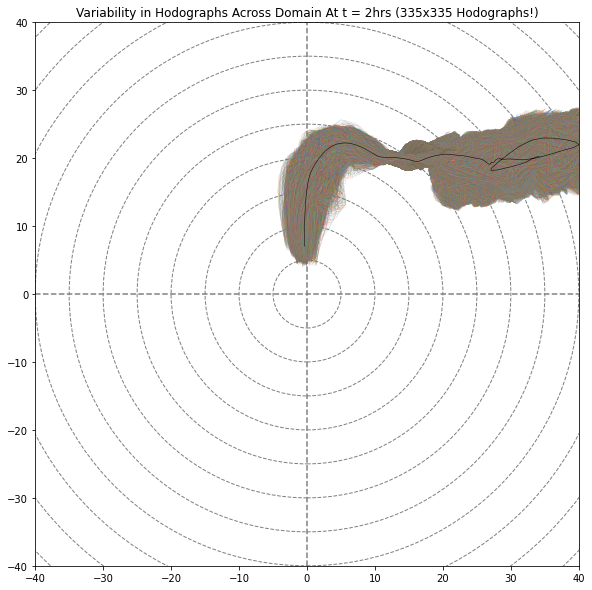

In [34]:
#Create A Swath of Hodographs Over the Entire Domain

gr_u_tot = storm16_data['uinterp'].loc[:,:, computations_data['y-direction'], computations_data['x-direction']]+offset_u
gr_v_tot = storm16_data['vinterp'].loc[:,:, computations_data['y-direction'], computations_data['x-direction']]+offset_v

#Create Hodographs
fig, ax = plt.subplots(figsize = (10,10))
h = metpy.plots.Hodograph(ax, component_range=40.)
h.add_grid(increment=5)

#Each Hodograph at Each Grid Point
for x in tqdm((np.arange(0,gr_u_tot.shape[3],1)), desc = 'Loading...'):
    for y in np.arange(0,gr_v_tot.shape[3],1):
        h.plot(gr_u_tot.loc[:,:,y,x][0],gr_v_tot.loc[:,:,y,x][0], linewidth = 0.1)

#Put The Domain Averaged Hodograph On Last
gr_u_avg = gr_u_tot[0].mean(axis = (1,2))
gr_v_avg = gr_v_tot[0].mean(axis = (1,2))
h.plot(gr_u_avg, gr_v_avg, color ='k', linewidth = 0.5)

plt.title(f"Variability in Hodographs Across Domain At t = 2hrs ({len(computations_data['x-direction'])}x{len(computations_data['y-direction'])} Hodographs!)")


# **Bunkers Storm Motion Variability**

In [35]:
#Define A Function That Computes Pressure-Weighted Mean Wind Over Specified Layer 

def mean_wind(top, bottom = None):
    #if bottom of layer isn't specified, assume that we start from the lowest level 
    if bottom is None:
        bottom = 0
        top = top
    
    #Using Pressure Data From Storm16 
    P = storm16_data['prs'][0].loc[:,computations_data['y-direction'],computations_data['x-direction']]
    
    #Start Relevant Counters at 0
    u_sum = 0.0
    v_sum = 0.0
    dp_sum = 0.0
    
    #Start Computations 
    for x in tqdm(np.arange(bottom,top,1)):
        if x == bottom:
            #initialize first data point 
            p_old = P[bottom].values
            u_old = gr_u_tot[bottom].values
            v_old = gr_v_tot[bottom].values
        else:
            #calculate dp and layer means 
            dp = p_old-P[x].values
            ulayermean = (gr_u_tot[x].values + u_old)/2
            vlayermean = (gr_v_tot[x].values + v_old)/2
            
            #update sums
            u_sum += dp*ulayermean
            v_sum += dp*vlayermean
            dp_sum += dp
            
            #update old values 
            p_old = P[x]
            u_old = gr_u_tot[x]
            v_old = gr_v_tot[x]
    
    #compute mean wind
    mean_u = u_sum/dp_sum
    mean_v = v_sum/dp_sum
    
    return mean_u.values,mean_v.values;
    

In [36]:
#Need To Compute Bunkers on My Own Because Metpy Runs Too Slow

#Global Variables Needed
P = storm16_data['prs'][0] #Pres in Pa
height = storm16_data['z'].values #Height in km
gr_u_tot = storm16_data['uinterp'].loc[:,:, computations_data['y-direction'], computations_data['x-direction']][0]+offset_u
gr_v_tot = storm16_data['vinterp'].loc[:,:, computations_data['y-direction'], computations_data['x-direction']][0]+offset_v

#Height Indexes of Interest
z_6km = (np.abs(height - 6)).argmin()
z_500m = (np.abs(height - .5)).argmin()
z_5500m = (np.abs(height - 5.5)).argmin()
#Step 1: compute mean wind over 500m, 6km, and 5500mto6km (first element in arrays are u-component, 2nd is v-component)
mean_6km = np.array(mean_wind(top = z_6km))
mean_500m = np.array(mean_wind(top = z_500m))
mean_5500m_2_6km = np.array(mean_wind(top = z_6km, bottom = z_5500m))

#Step 2: Compute Shear Vector, its cross product with the k vector, and compute shear vector magnitude
shear = mean_5500m_2_6km - mean_500m #Shear Vector

dtype = np.dtype([('u-component', float), ('v-component', float)])
shear_cross = np.empty((computations_data['y-direction'].shape[0],computations_data['x-direction'].shape[0]), dtype = dtype)
shear_cross['u-component'] = shear[1]
shear_cross['v-component'] = -shear[0]
shear_mag = np.hypot(shear[0], shear[1])

#Step 3: Compute Deviant Motion in Accordance with Bunkers (2000)
rdev_scalar = 7.5/shear_mag
rdev = np.empty((computations_data['y-direction'].shape[0],computations_data['x-direction'].shape[0]), dtype = dtype)
rdev['u-component'] = shear_cross['u-component']*rdev_scalar
rdev['v-component'] = shear_cross['v-component']*rdev_scalar

#Compute Storm Motion For Right Mover
right_mover = np.empty((computations_data['y-direction'].shape[0],computations_data['x-direction'].shape[0]), dtype = dtype)
right_mover['u-component'] = rdev['u-component']+mean_6km[0]
right_mover['v-component'] = rdev['v-component']+mean_6km[1]


100%|██████████| 3/3 [00:00<00:00, 110.28it/s]


Loading...: 100%|██████████| 335/335 [01:18<00:00,  4.28it/s]


Text(0, 0.5, 'v-component (m/s)')

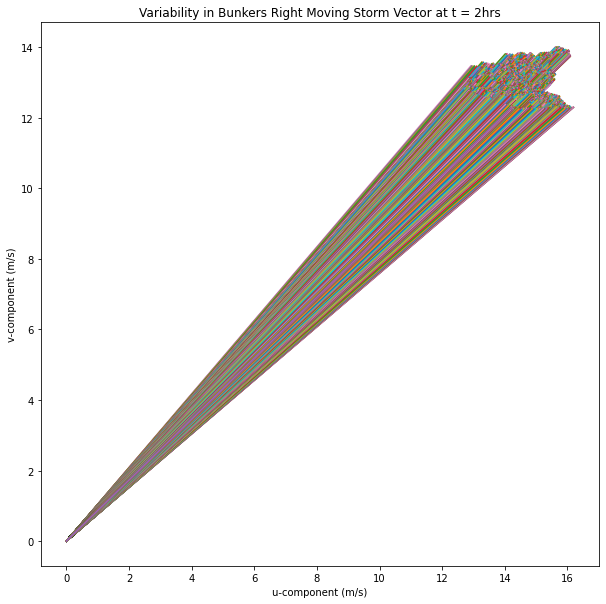

In [37]:
#Make Plot Of Bunkers Storm Motions 

#Create Hodographs
fig, ax = plt.subplots(figsize = (10,10))

for x in tqdm((np.arange(0,computations_data['x-direction'].shape[0],1)), desc = 'Loading...'):
    for y in np.arange(0,computations_data['y-direction'].shape[0],1):
        ax.plot([0,right_mover['u-component'][y][x]],[0,right_mover['v-component'][y][x]])
        
plt.title('Variability in Bunkers Right Moving Storm Vector at t = 2hrs')
plt.xlabel('u-component (m/s)')
plt.ylabel('v-component (m/s)')

Loading...: 100%|██████████| 335/335 [01:22<00:00,  4.07it/s]


Text(0, 0.5, 'v-component (m/s)')

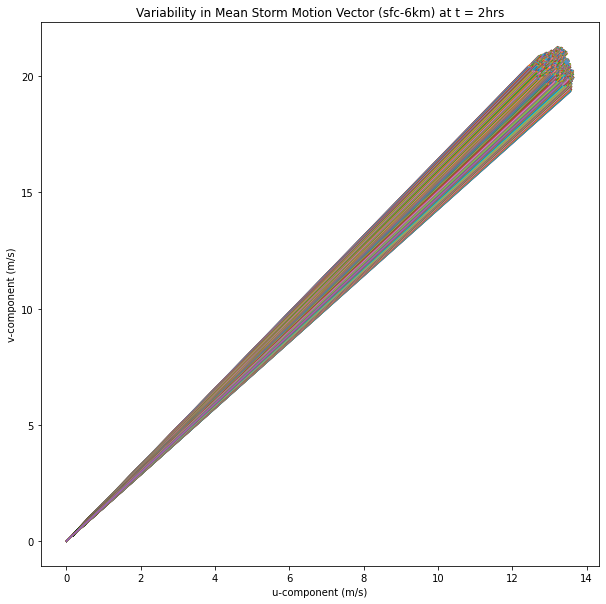

In [38]:
#Make Plot Of Mean Wind Vectors
#Create Hodographs
fig, ax = plt.subplots(figsize = (10,10))

for x in tqdm((np.arange(0,computations_data['x-direction'].shape[0],1)), desc = 'Loading...'):
    for y in np.arange(0,computations_data['y-direction'].shape[0],1):
        ax.plot([0,mean_6km[0][y][x]],[0,mean_6km[1][y][x]])
        
plt.title('Variability in Mean Storm Motion Vector (sfc-6km) at t = 2hrs')
plt.xlabel('u-component (m/s)')
plt.ylabel('v-component (m/s)')

Loading...: 100%|██████████| 335/335 [01:16<00:00,  4.37it/s]


Text(0, 0.5, 'v-component (m/s)')

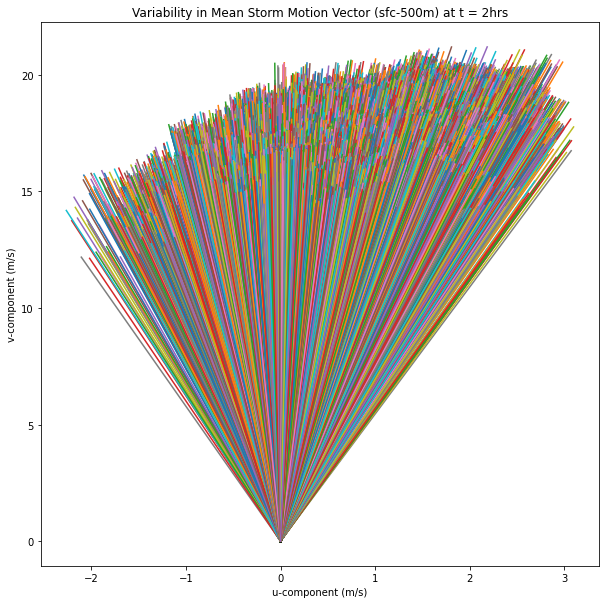

In [39]:
#Make Plot Of Mean Wind Vectors
#Create Hodographs
fig, ax = plt.subplots(figsize = (10,10))

for x in tqdm((np.arange(0,computations_data['x-direction'].shape[0],1)), desc = 'Loading...'):
    for y in np.arange(0,computations_data['y-direction'].shape[0],1):
        ax.plot([0,mean_500m[0][y][x]],[0,mean_500m[1][y][x]])
        
plt.title('Variability in Mean Storm Motion Vector (sfc-500m) at t = 2hrs')
plt.xlabel('u-component (m/s)')
plt.ylabel('v-component (m/s)')

Loading...: 100%|██████████| 335/335 [01:20<00:00,  4.15it/s]


Text(0, 0.5, 'v-component (m/s)')

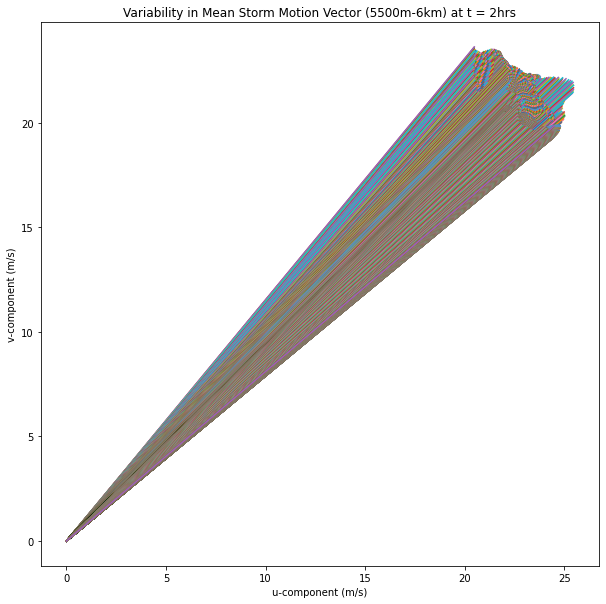

In [40]:
#Make Plot Of Mean Wind Vectors
#Create Hodographs
fig, ax = plt.subplots(figsize = (10,10))

for x in tqdm((np.arange(0,computations_data['x-direction'].shape[0],1)), desc = 'Loading...'):
    for y in np.arange(0,computations_data['y-direction'].shape[0],1):
        ax.plot([0,mean_5500m_2_6km[0][y][x]],[0,mean_5500m_2_6km[1][y][x]])
        
plt.title('Variability in Mean Storm Motion Vector (5500m-6km) at t = 2hrs')
plt.xlabel('u-component (m/s)')
plt.ylabel('v-component (m/s)')